# Алгоритм Гирвана-Ньюмена. Лувенский алгоритм.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 3: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html
    * https://matplotlib.org/stable/users/explain/colors/colormaps.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html

## Вопросы для совместного обсуждения

1\. Обсудите принцип работы алгоритма Гирвана-Ньюмена и Лувенского алгоритма и реализации этих алгоритмов в `networkx.`

In [11]:
import networkx as nx
import seaborn as sns

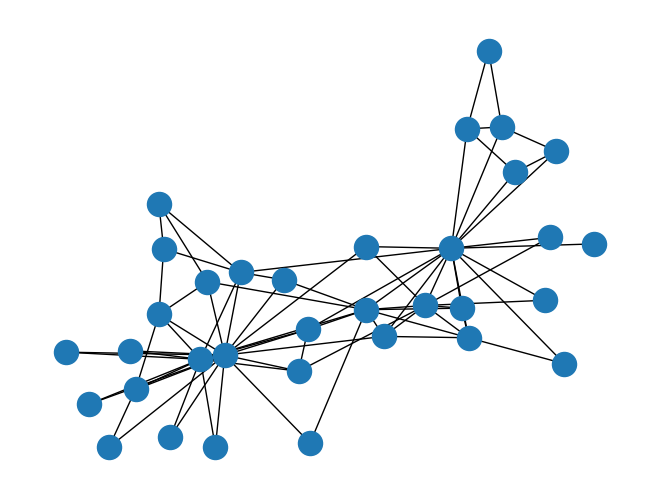

In [ ]:
G = nx.karate_club_graph()
nx.draw(G)

In [ ]:
comms_iter = nx.community.girvan_newman(G)
comms_iter

<generator object girvan_newman at 0x7c6534aecac0>

In [ ]:
c = next(comms_iter)
c

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

In [ ]:
c = next(comms_iter)
c

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 {9})

In [ ]:
for c in comms_iter:
  print(len(c))

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [ ]:
comms_iter = nx.community.louvain_partitions(G)
comms_iter

<generator object louvain_partitions at 0x7c6534aed000>

In [ ]:
next(comms_iter)

[{4, 10},
 {5, 6, 16},
 {0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21},
 {9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 32, 33},
 {24, 25, 28, 31},
 {8, 30}]

In [ ]:
comms = nx.community.louvain_communities(G)
comms

[{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21},
 {4, 5, 6, 10, 16},
 {8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33},
 {23, 24, 25, 27, 28, 31}]

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Считайте сеть из файла `communities.edgelist`. Выполните разбиение сети на 2 сообщества с помощью алгоритма Гирвана-Ньюмена. Визуализируйте результат, раскрасив узлы в цвет, соответствующий их сообществу.

- [X] Проверено на семинаре

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman

In [2]:
G = nx.read_edgelist('/content/communities.edgelist', nodetype=int)

In [ ]:
comms_iter = girvan_newman(G)

In [ ]:
comms = next(comms_iter)

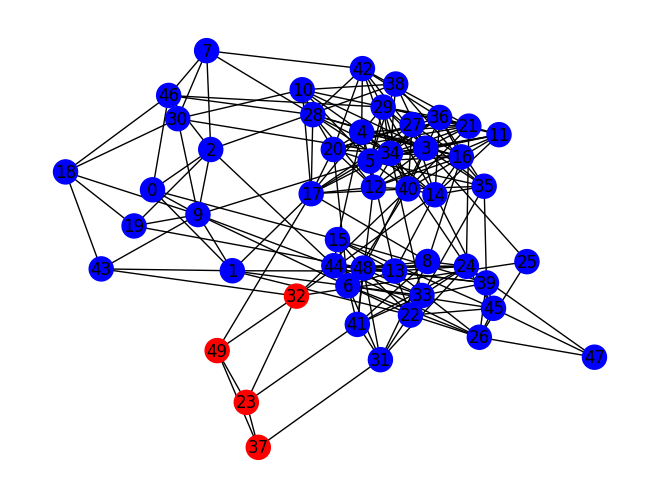

In [ ]:
colors = ['r' if node in comms[0] else 'b' for node in G.nodes()]

nx.draw(G, with_labels=True, node_color=colors)
plt.show()


<p class="task" id="2"></p>

2\. Постройте график динамики модулярности для шагов алгоритма Гирвана-Ньюмена. Визуализируйте разбиение сети из предыдущей задачи, при котором достигается наилучшее значение модулярности (выведите это значение на экран). Для визуализации выберите несколько цветов (в соответствии с количеством выделенных сообществ) и раскрасьте узлы __и связи__ в рамках одного сообщества этими цветами. Связи между узлами, состоящими в разных сообществах, отрисуйте черным цветом.

- [X] Проверено на семинаре

In [ ]:
from networkx.algorithms.community.quality import modularity

In [ ]:
comm_iter = girvan_newman(G)
mods = []
best_mod = -1
best_part = None


In [ ]:
for comm in comm_iter:
    mod = modularity(G, comm)
    mods.append(mod)
    if mod > best_mod:
        best_mod = mod
        best_part = comm

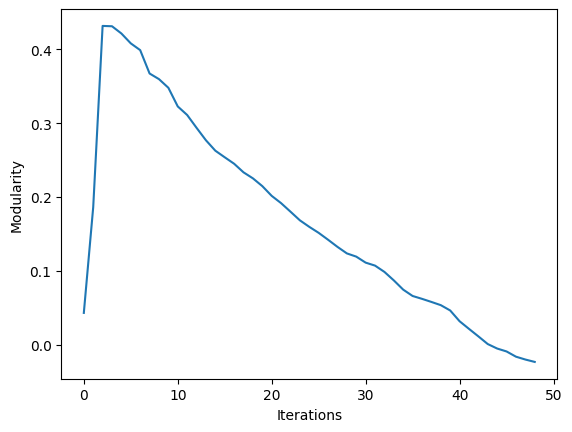

In [ ]:
plt.plot(mods)
plt.xlabel('Iterations')
plt.ylabel('Modularity')
plt.show()

In [ ]:
best_mod

0.4315950788751715

In [ ]:
len(best_part)

4

In [ ]:
best_part

({23, 32, 37, 49},
 {6, 8, 13, 15, 22, 24, 25, 26, 31, 33, 39, 41, 44, 45, 47, 48},
 {3, 4, 5, 10, 11, 12, 14, 16, 17, 20, 21, 27, 28, 29, 34, 35, 36, 38, 40, 42},
 {0, 1, 2, 7, 9, 18, 19, 30, 43, 46})

In [ ]:
colors = ['r', 'g', 'b', 'y']
pos = nx.spring_layout(G)
m = False

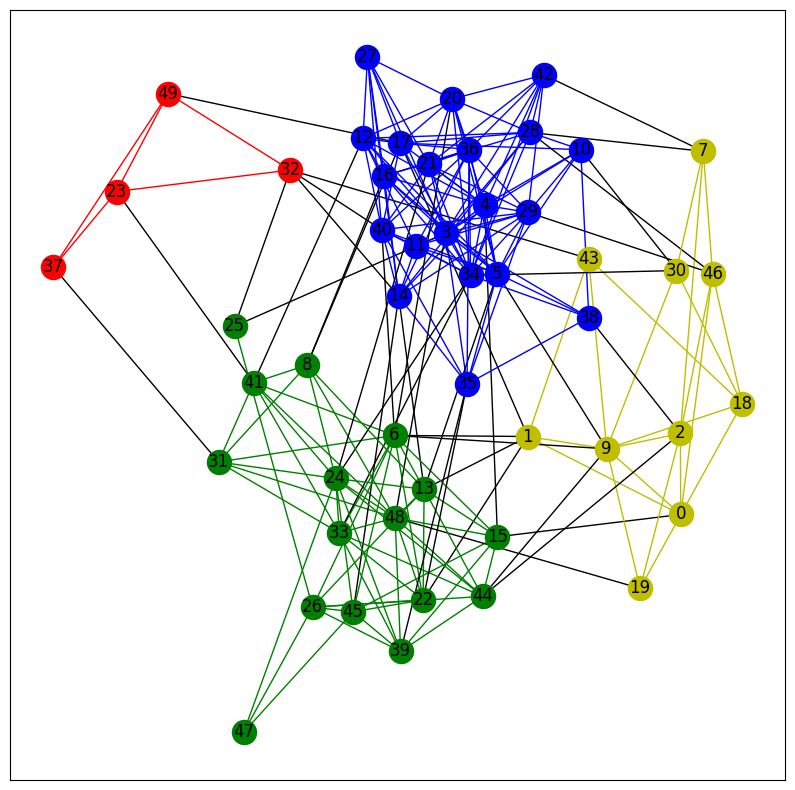

In [ ]:
plt.figure(figsize=(10, 10))

for i, comm in enumerate(best_part):
    for node in comm:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=colors[i])


for edge in G.edges():
    for col, p in enumerate(best_part):
      if edge[0] in p and edge[1] in p:
        m = True
        color = col

    if m:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color=colors[color])
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color='black')

    m = False

nx.draw_networkx_labels(G, pos)
plt.show()


<p class="task" id="3"></p>

3\. Выполните разбиение сети из первого задания на сообщества с помощью Лувенского алгоритма. Визуализируйте результат аналогично предыдущему заданию.

- [X] Проверено на семинаре

In [ ]:
comms = nx.community.louvain_communities(G)

In [ ]:
comms

[{23, 25, 32, 37, 49},
 {6, 8, 13, 15, 22, 24, 26, 31, 33, 39, 41, 44, 45, 47, 48},
 {0, 1, 2, 7, 9, 18, 19, 30, 43, 46},
 {3, 4, 5, 10, 11, 12, 14, 16, 17, 20, 21, 27, 28, 29, 34, 35, 36, 38, 40, 42}]

In [ ]:
colors = ['r', 'g', 'b', 'y']
pos = nx.spring_layout(G)
m = False

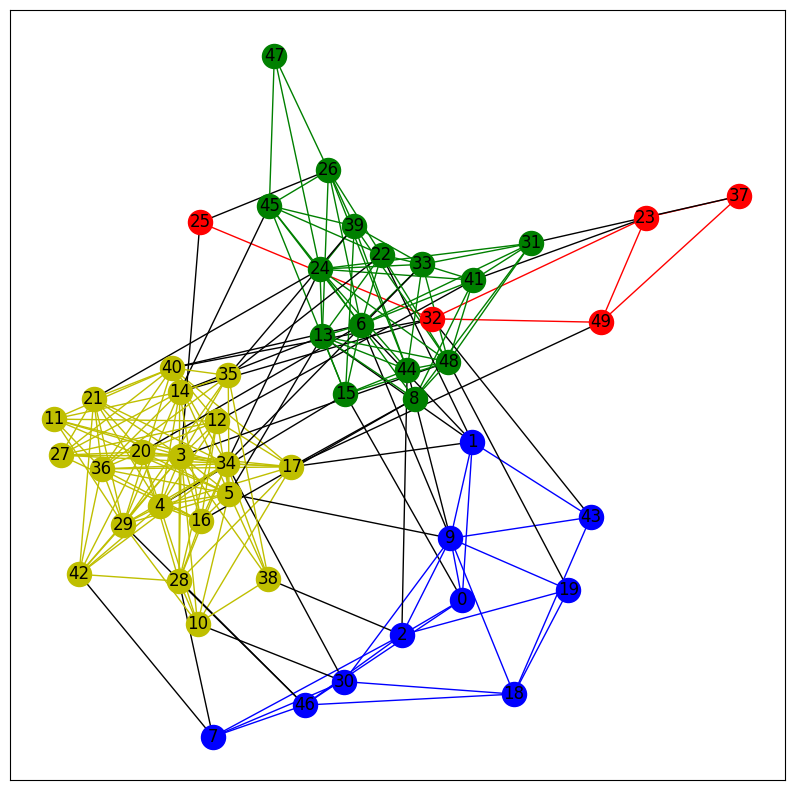

In [ ]:
plt.figure(figsize=(10, 10))

for i, comm in enumerate(comms):
    for node in comm:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=colors[i])


for edge in G.edges():
    for col, p in enumerate(comms):
        if edge[0] in p and edge[1] in p:
            m = True
            color = col

    if m:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color=colors[color])
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color='black')

    m = False

nx.draw_networkx_labels(G, pos)
plt.show()


<p class="task" id="4"></p>

4\. Постройте матрицу смежности для сети. Постройте матрицу смежности для сети, в которой узлы перенумерованы в порядке возрастания номера сообщества, которому они принадлежат (т.е. номера $0...C_1-1$ даются $C_1$ узлам, принадлежащим первому сообществу; номера $C_1...C_2-1$ даются $C_2$ узлам, принадлежащим второму сообществу и т.д.). Для разбиения графа на сообщества воспользуйтесь Лувенским алгоритмом.

Визуализируйте две матрицы смежности при помощи `seaborn.heatmap`. Расположите рисунки рядом по горизонтали, добавьте названия рисунков. Сравните полученные изображения и сделайте выводы.

- [ ] Проверено на семинаре

In [3]:
comms = nx.community.louvain_communities(G)

In [4]:
adj_matrix = nx.to_numpy_array(G)
adj_matrix

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
node_label = {}
for i, comm in enumerate(comms):
    for node in comm:
        node_label[node] = i

In [6]:
comms

[{23, 25, 32, 37, 49},
 {1, 6, 8, 13, 15, 22, 24, 26, 31, 33, 39, 41, 44, 45, 47, 48},
 {0, 2, 7, 9, 18, 19, 30, 43, 46},
 {3, 4, 5, 10, 11, 12, 14, 16, 17, 20, 21, 27, 28, 29, 34, 35, 36, 38, 40, 42}]

In [7]:
node_label.keys()

dict_keys([32, 49, 37, 23, 25, 1, 6, 8, 13, 15, 22, 24, 26, 31, 33, 39, 41, 44, 45, 47, 48, 0, 2, 7, 9, 43, 46, 18, 19, 30, 3, 4, 5, 10, 11, 12, 14, 16, 17, 20, 21, 27, 28, 29, 34, 35, 36, 38, 40, 42])

In [8]:
adj_matrix_ord = nx.to_numpy_array(G, nodelist=node_label.keys())

In [9]:
adj_matrix_ord

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

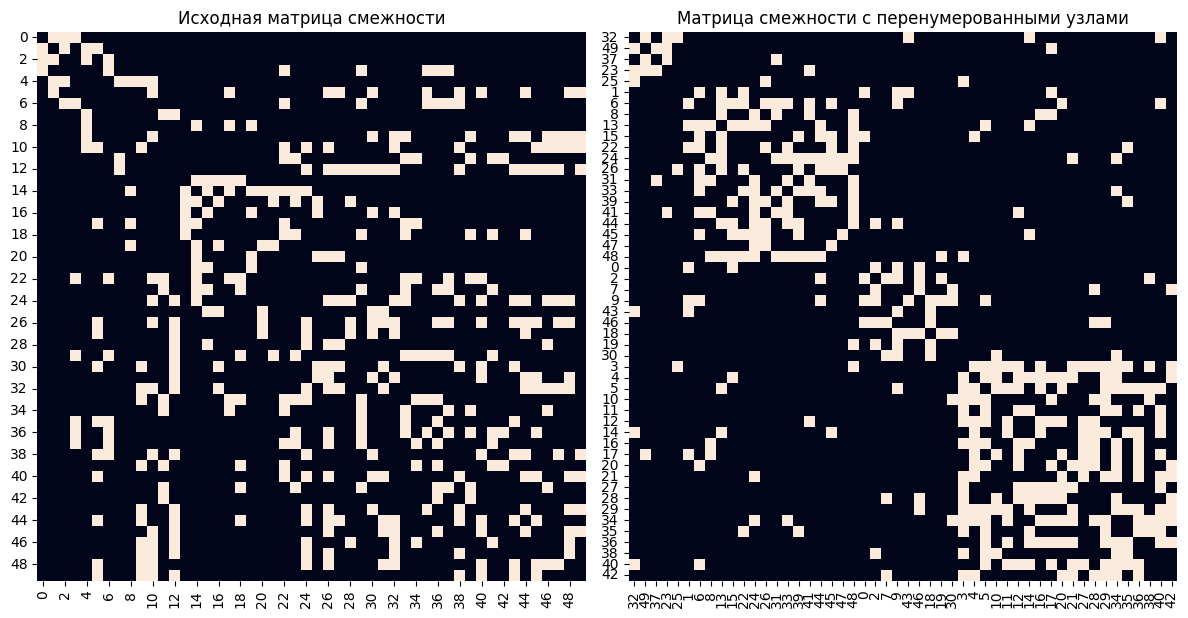

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(nx.to_numpy_array(G), ax=axes[0], square=True, cbar=False)
axes[0].set_title('Исходная матрица смежности')

sns.heatmap(adj_matrix_ord, ax=axes[1], square=True, cbar=False,
            xticklabels=node_label.keys(), yticklabels=node_label.keys())
axes[1].set_title('Матрица смежности с перенумерованными узлами')

plt.tight_layout()
plt.show()

In [ ]:
# на втором графике видно разделение на 4 сообщества (узлы из одно сообщества имеют больше связей между собой, чем с другими узлами)

<p class="task" id="5"></p>

5\. Оформите результаты работы алгоритмов в виде таблицы

| Алгоритм                      | Средняя плотность сообществ | Модулярность | Покрытие | Эффективность |
|-------------------------------|-----------------------------|--------------|----------|----------|
| Гирвана-Ньюмена              |                             |              |          |          |
| Лувенский                     |                             |              |          |          |

Для представления данных в табличном виде используйте `pandas`. Для алгоритма Гирвана-Ньюмена берите разбиение, максимизирующее модулярность. Все расчеты метрик при решении этой задачи выполните повторно.

- [ ] Проверено на семинаре

In [ ]:
import pandas as pd
from networkx.algorithms.community.quality import partition_quality

In [ ]:
comm_iter = girvan_newman(G)

comms_gn = None
max_mod = -1
for comm in comm_iter:
    mod = nx.community.modularity(G, comm)
    if mod > max_mod:
        max_mod = mod
        comms_gn = comm

In [ ]:
comms_lv = nx.community.louvain_communities(G)

In [ ]:
density_gn = sum([nx.density(G.subgraph(comm)) for comm in comms_gn])/len(comms_gn)
mod_gn = nx.community.modularity(G, comms_gn)
quality_gn = partition_quality(G, comms_gn)
cov_gn = quality_gn[0]
perf_gn = quality_gn[1]

density_lv = sum([nx.density(G.subgraph(comm)) for comm in comms_lv])/len(comms_lv)
mod_lv = nx.community.modularity(G, comms_lv)
quality_lv = partition_quality(G, comms_lv)
cov_lv = quality_lv[0]
perf_lv = quality_lv[1]




data = {
    "Алгоритм": ["Гирвана-Ньюмена", "Лувенский"],
    "Средняя плотность сообществ": [density_gn, density_lv],
    "Модулярность": [mod_gn, mod_lv],
    "Покрытие": [cov_gn, cov_lv],
    "Эффективность": [perf_gn, perf_lv]
}

df = pd.DataFrame(data)

In [ ]:
df

,Алгоритм,Средняя плотность сообществ,Модулярность,Покрытие,Эффективность
0,Гирвана-Ньюмена,0.558808,0.431595,0.814815,0.816327
1,Лувенский,0.511586,0.429302,0.814815,0.820408
